In [12]:
import pandas as pd


In [14]:
df = pd.read_csv('enhanced_nutrition_data.csv')


In [16]:
df.head()  # نمایش 5 سطر اول


,Child ID,Age (months),Gender,Weight (kg),Height (cm),Feeding Type,Essential Nutrient,Daily Intake (mg),Feeding Frequency (times/day),Health Status,Hospital Department,Admission Date,Discharge Date,Extra Info,Comments
0,52,6,unknown,11.71,62.01,mixed,protein,44.0,6.0,UnkNown,General,2025-01-01,2025-01-05,NaN,Check
1,93,8,female,9.29,76.73,NaN,iron,22.0,4.0,malnutrition,NaN,2025-01-02,2025-01-06,NaN,Unknown
2,15,14,unknown,2.89,56.19,Formula,protein,29.0,5.0,malnutrition,Nutrition,2025-01-03,2025-01-07,Irrelevant,Incomplete
3,72,14,MALE,6.29,59.86,NaN,iron,37.0,6.0,overweight,General,2025-01-04,2025-01-08,Irrelevant,Unknown
4,61,9,unknown,6.62,64.55,Formula,Calcium,44.0,5.0,not available,Nutrition,2025-01-05,2025-01-09,Unknown,Check


In [18]:
df.columns  # بررسی نام ستون‌ها


Index(['Child ID', 'Age (months)', 'Gender', 'Weight (kg)', 'Height (cm)',
       'Feeding Type', 'Essential Nutrient', 'Daily Intake (mg)',
       'Feeding Frequency (times/day)', 'Health Status', 'Hospital Department',
       'Admission Date', 'Discharge Date', 'Extra Info', 'Comments'],
      dtype='object')

In [20]:
df_sorted = df.sort_values(by=["Age (months)", "Weight (kg)"])## (1) مرتب‌سازی داده‌ها بر اساس سن و وزن برای نظم بیشترپیش از تحلیل داده


In [22]:
df_sorted.to_csv('enhanced_nutrition_data_sorted.csv', index=False)


In [24]:
print(df.columns.tolist())


['Child ID', 'Age (months)', 'Gender', 'Weight (kg)', 'Height (cm)', 'Feeding Type', 'Essential Nutrient', 'Daily Intake (mg)', 'Feeding Frequency (times/day)', 'Health Status', 'Hospital Department', 'Admission Date', 'Discharge Date', 'Extra Info', 'Comments']


In [26]:
df_sorted.isnull().sum()## (3) بررسی تعداد مقادیر گمشده (NaN) در هر ستون برای تصمیم‌گیری در مورد پاکسازی


Child ID                          0
Age (months)                      0
Gender                            0
Weight (kg)                       1
Height (cm)                       1
Feeding Type                     23
Essential Nutrient                0
Daily Intake (mg)                 1
Feeding Frequency (times/day)     1
Health Status                     0
Hospital Department              33
Admission Date                    0
Discharge Date                    0
Extra Info                       73
Comments                          0
dtype: int64

In [32]:
numeric_cols = ["Weight (kg)", "Height (cm)", "Daily Intake (mg)", "Feeding Frequency (times/day)"]#4) پر کردن مقادیر گمشده در ستون‌های عددی با میانه (برای جلوگیری از تأثیر داده‌های پرت)
df_sorted[numeric_cols] = df_sorted[numeric_cols].fillna(df_sorted[numeric_cols].median())


In [34]:
df_sorted.head(10)

,Age (months),Gender,Weight (kg),Height (cm),Feeding Type,Essential Nutrient,Daily Intake (mg),Feeding Frequency (times/day),Health Status,Hospital Department,Admission Date,Discharge Date
33,0,unknown,2.66,76.36,unknown,none,25.0,7.0,normal,NaN,2025-02-03,2025-02-07
109,0,female,3.29,73.77,unknown,none,32.0,4.0,not available,General,2025-04-20,2025-04-24
73,0,female,4.98,70.61,unknown,none,11.0,6.0,UnkNown,NaN,2025-03-15,2025-03-19
72,0,male,5.74,82.31,Formula,Calcium,44.0,7.0,normal,General,2025-03-14,2025-03-18
95,0,MALE,6.09,57.09,unknown,protein,42.0,4.0,normal,Pediatrics,2025-04-06,2025-04-10
143,0,unknown,9.23,63.52,unknown,none,25.0,4.0,malnutrition,General,2025-05-24,2025-05-28
34,0,unknown,9.75,62.29,mixed,iron,13.0,2.0,UnkNown,Nutrition,2025-02-04,2025-02-08
126,0,Female,10.45,65.67,mixed,protein,36.0,6.0,normal,Unknown,2025-05-07,2025-05-11
44,0,male,11.37,62.47,unknown,Calcium,6.0,7.0,normal,Nutrition,2025-02-14,2025-02-18
114,0,MALE,11.49,72.36,unknown,Calcium,5.0,6.0,not available,Unknown,2025-04-25,2025-04-29


In [44]:
print(df_sorted.columns.tolist())#این دستور همه شتون های مرتب شده را بصورت لیست بر میگرداند


['Age (months)', 'Gender', 'Weight (kg)', 'Height (cm)', 'Feeding Type', 'Essential Nutrient', 'Daily Intake (mg)', 'Feeding Frequency (times/day)', 'Health Status', 'Hospital Department', 'Admission Date', 'Discharge Date']


In [ ]:
columns_to_drop = ['Hospital Department', 'Discharge Date']
df_sorted = df_sorted.drop(columns=columns_to_drop)#زمان بستری و زمان ترخیص کودک حذف ستون های غیر ضروری


In [48]:
print(df_sorted.columns.tolist())


['Age (months)', 'Gender', 'Weight (kg)', 'Height (cm)', 'Feeding Type', 'Essential Nutrient', 'Daily Intake (mg)', 'Feeding Frequency (times/day)', 'Health Status', 'Admission Date']


In [52]:
cols_to_check = ["Age (months)", "Weight (kg)"]# حذف داده‌های پرت (outliers) از ستون‌های سن و وزن با استفاده از IQR

for col in cols_to_check:
    Q1 = df_sorted[col].quantile(0.25)
    Q3 = df_sorted[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df_sorted = df_sorted[(df_sorted[col] >= lower_bound) & (df_sorted[col] <= upper_bound)]


In [54]:
# لیست ستون‌های عددی که می‌خواهیم مقادیر گمشده‌شان را پر کنیم
numeric_cols = ["Weight (kg)", "Height (cm)", "Daily Intake (mg)", "Feeding Frequency (times/day)"]

# پر کردن NaN با مقدار میانه هر ستون
df_sorted[numeric_cols] = df_sorted[numeric_cols].fillna(df_sorted[numeric_cols].median())


In [56]:
pd.set_option('display.max_rows', None)      # نمایش همه ردیف‌ها
pd.set_option('display.max_columns', None)   # نمایش همه ستون‌ها


In [58]:
df_sorted


,Age (months),Gender,Weight (kg),Height (cm),Feeding Type,Essential Nutrient,Daily Intake (mg),Feeding Frequency (times/day),Health Status,Admission Date
33,0,unknown,2.66,76.36,unknown,none,25.0,7.0,normal,2025-02-03
109,0,female,3.29,73.77,unknown,none,32.0,4.0,not available,2025-04-20
73,0,female,4.98,70.61,unknown,none,11.0,6.0,UnkNown,2025-03-15
72,0,male,5.74,82.31,Formula,Calcium,44.0,7.0,normal,2025-03-14
95,0,MALE,6.09,57.09,unknown,protein,42.0,4.0,normal,2025-04-06
143,0,unknown,9.23,63.52,unknown,none,25.0,4.0,malnutrition,2025-05-24
34,0,unknown,9.75,62.29,mixed,iron,13.0,2.0,UnkNown,2025-02-04
126,0,Female,10.45,65.67,mixed,protein,36.0,6.0,normal,2025-05-07
44,0,male,11.37,62.47,unknown,Calcium,6.0,7.0,normal,2025-02-14
114,0,MALE,11.49,72.36,unknown,Calcium,5.0,6.0,not available,2025-04-25


In [60]:
# همه حروف رو به lowercase تبدیل کن و فاصله‌های اضافی رو حذف کن
df_sorted['Gender'] = df_sorted['Gender'].str.lower().str.strip()

# اگر بخوای به شکل دقیق‌تری فقط گزینه‌های خاصی رو نگه داری:
df_sorted['Gender'] = df_sorted['Gender'].replace({
    'male': 'male',
    'female': 'female',
    'unknown': 'unknown',
    'unknwn': 'unknown',     # اگر تایپ اشتباه باشه
    'femal': 'female'        # یا مثل این
})


In [62]:
# تبدیل به اعداد صحیح (integer)
df_sorted['Age (months)'] = df_sorted['Age (months)'].astype('int')

# تبدیل به عدد اعشاری (float)
df_sorted['Weight (kg)'] = df_sorted['Weight (kg)'].astype('float')
df_sorted['Height (cm)'] = df_sorted['Height (cm)'].astype('float')


In [ ]:
import pandas as pd

df_sorted = pd.read_csv('enhanced_nutrition_data.csv')# دوباره خواندن لایبرری و فایل سیو شده در روز دوم کاری


In [55]:
df_sorted[df_sorted.duplicated(subset='Child ID', keep=False)]#نمایش دوتایی ها#


,Child ID,Age (months),Gender,Weight (kg),Height (cm),Feeding Type,Essential Nutrient,Daily Intake (mg),Feeding Frequency (times/day),Health Status,Hospital Department,Admission Date,Discharge Date,Extra Info,Comments
1,93,8,female,9.29,76.73,NaN,iron,22.0,4.0,malnutrition,NaN,2025-01-02,2025-01-06,NaN,Unknown
2,15,14,unknown,2.89,56.19,Formula,protein,29.0,5.0,malnutrition,Nutrition,2025-01-03,2025-01-07,Irrelevant,Incomplete
3,72,14,MALE,6.29,59.86,NaN,iron,37.0,6.0,overweight,General,2025-01-04,2025-01-08,Irrelevant,Unknown
5,21,12,male,9.57,56.42,mixed,none,47.0,3.0,not available,Pediatrics,2025-01-06,2025-01-10,Irrelevant,Check
7,87,6,male,4.25,70.72,NaN,Unknown,48.0,2.0,malnutrition,Pediatrics,2025-01-08,2025-01-12,NaN,Unknown
8,75,16,Other,3.27,78.34,NaN,none,40.0,6.0,overweight,Pediatrics,2025-01-09,2025-01-13,Irrelevant,Valid
9,75,19,Female,6.57,79.52,Formula,VITAMIN D,8.0,5.0,UnkNown,Nutrition,2025-01-10,2025-01-14,NaN,Check
10,88,3,fEMale,9.04,82.03,Solid,protein,9.0,4.0,malnutrition,General,2025-01-11,2025-01-15,NaN,Unknown
11,100,4,Female,3.05,78.49,Formula,Unknown,41.0,3.0,overweight,NaN,2025-01-12,2025-01-16,NaN,Unknown
12,24,22,Female,11.19,75.65,NaN,VITAMIN D,12.0,3.0,overweight,NaN,2025-01-13,2025-01-17,NaN,Check


In [57]:
df_sorted = df_sorted.drop_duplicates(subset='Child ID', keep='first'# حذف دوتایی هاا در ستون مشخص


In [59]:
# (1) تبدیل همه حروف به حروف کوچک (lowercase) و حذف فاصله‌های اضافی از ابتدا و انتها
df_sorted['Gender'] = df_sorted['Gender'].str.lower().str.strip()


In [61]:
# (2) اصلاح تایپ‌ها و نوشتارهای اشتباه احتمالی در ستون 'Gender'
df_sorted['Gender'] = df_sorted['Gender'].replace({
    'male': 'male',
    'female': 'female',
    'unknwon': 'unknown',  # اگر تایپ اشتباه باشه مثل این
    'unkown': 'unknown',   # یا مثل این
    'femal': 'female'      # یا این
})


In [63]:
# (3) تبدیل ستون Age به عدد صحیح (int) برای پردازش عددی
df_sorted['Age (months)'] = df_sorted['Age (months)'].astype('int')


In [65]:
# (4) تبدیل ستون‌های وزن و قد به عدد اعشاری (float) برای محاسبات دقیق
df_sorted['Weight (kg)'] = df_sorted['Weight (kg)'].astype('float')
df_sorted['Height (cm)'] = df_sorted['Height (cm)'].astype('float')


In [67]:
# (5) تبدیل ستون‌های متنی مشخص به نوع category برای بهینه‌سازی حافظه و کارایی بهتر
df_sorted['Gender'] = df_sorted['Gender'].astype('category')
df_sorted['Feeding Type'] = df_sorted['Feeding Type'].astype('category')
df_sorted['Health Status'] = df_sorted['Health Status'].astype('category')
df_sorted['Essential Nutrient'] = df_sorted['Essential Nutrient'].astype('category')


In [69]:
# (1) نمای کلی از متغیرهای عددی: تعداد، میانگین، میانه، کمینه، بیشینه و چارک‌ها
df_sorted.describe()


,Child ID,Age (months),Weight (kg),Height (cm),Daily Intake (mg),Feeding Frequency (times/day)
count,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000
mean,50.093333,11.933333,6.830267,65.632133,27.800000,4.440000
std,29.066640,7.000643,2.736567,11.881773,12.550439,1.654151
min,1.000000,0.000000,2.660000,46.450000,5.000000,2.000000
25%,27.000000,6.000000,4.500000,56.560000,18.000000,3.000000
50%,50.000000,12.000000,6.700000,63.920000,29.000000,4.000000
75%,75.500000,18.000000,8.830000,76.005000,38.000000,6.000000
max,100.000000,23.000000,11.810000,89.810000,49.000000,7.000000


In [71]:
# (2) تعدادِ هر برچسب در ستون‌های رده‌ای اصلی
for col in ['Gender', 'Feeding Type', 'Health Status', 'Essential Nutrient']:
    print(f'\n------ {col} ------')
    print(df_sorted[col].value_counts())



------ Gender ------
Gender
male       29
female     19
unknown    16
other      11
Name: count, dtype: int64

------ Feeding Type ------
Feeding Type
unknown          18
Formula          15
breastfeeding    11
mixed            10
Solid             6
Name: count, dtype: int64

------ Health Status ------
Health Status
UNDERWEIGHT      16
UnkNown          14
malnutrition     14
normal           11
not available    10
overweight        9
NoRmAL            1
Name: count, dtype: int64

------ Essential Nutrient ------
Essential Nutrient
none         17
Unknown      16
VITAMIN D    12
iron         11
protein      11
Calcium       8
Name: count, dtype: int64


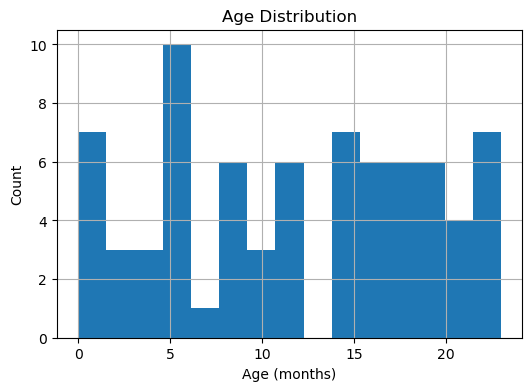

<Figure size 600x400 with 0 Axes>

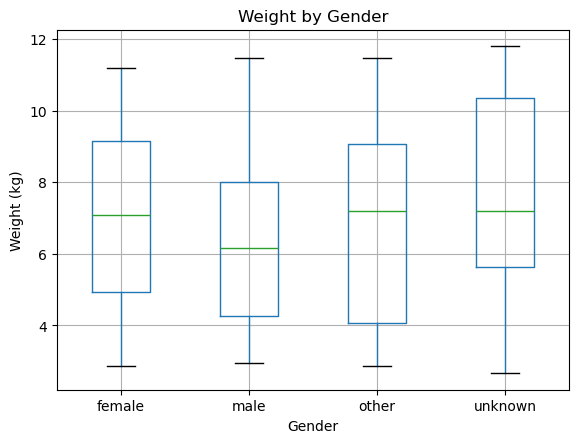

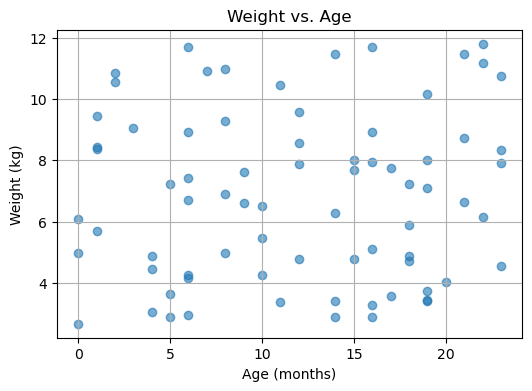

In [73]:
import matplotlib.pyplot as plt

# (3-a) توزیع سن (هیستوگرام)
plt.figure(figsize=(6,4))
df_sorted['Age (months)'].hist(bins=15)
plt.xlabel('Age (months)')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.grid(True)
plt.show()

# (3-b) جعبه‌نمودار وزن به تفکیک جنسیت
plt.figure(figsize=(6,4))
df_sorted.boxplot(column='Weight (kg)', by='Gender')
plt.ylabel('Weight (kg)')
plt.title('Weight by Gender')
plt.suptitle('')  # حذف عنوان اضافه‌ای که pandas می‌سازد
plt.show()

# (3-c) scatter وزن در مقابل سن
plt.figure(figsize=(6,4))
plt.scatter(df_sorted['Age (months)'], df_sorted['Weight (kg)'], alpha=0.6)
plt.xlabel('Age (months)')
plt.ylabel('Weight (kg)')
plt.title('Weight vs. Age')
plt.grid(True)
plt.show()


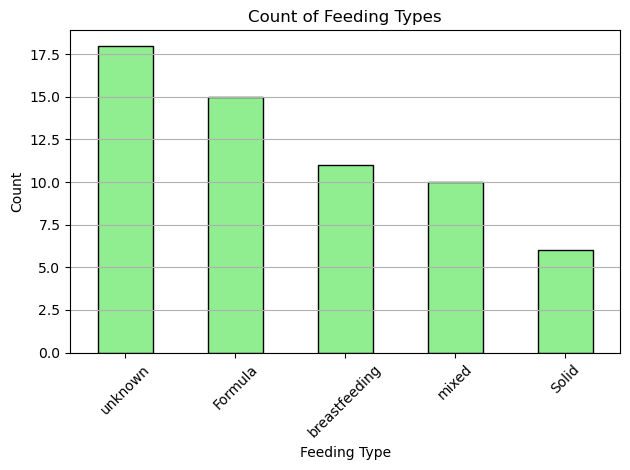

In [75]:
df_sorted['Feeding Type'].value_counts().plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Count of Feeding Types')
plt.xlabel('Feeding Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


<Figure size 700x400 with 0 Axes>

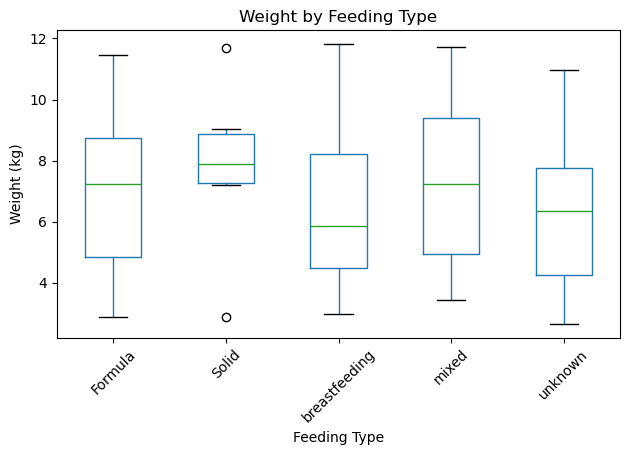

In [77]:
plt.figure(figsize=(7, 4))
df_sorted.boxplot(column='Weight (kg)', by='Feeding Type', grid=False)
plt.title('Weight by Feeding Type')
plt.suptitle('')  # حذف عنوان اضافی بالا
plt.xlabel('Feeding Type')
plt.ylabel('Weight (kg)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


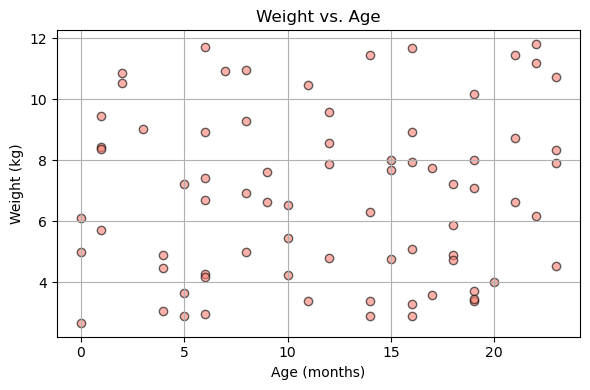

In [79]:
plt.figure(figsize=(6, 4))
plt.scatter(df_sorted['Age (months)'], df_sorted['Weight (kg)'],
            alpha=0.6, color='salmon', edgecolors='black')
plt.title('Weight vs. Age')
plt.xlabel('Age (months)')
plt.ylabel('Weight (kg)')
plt.grid(True)
plt.tight_layout()
plt.show()


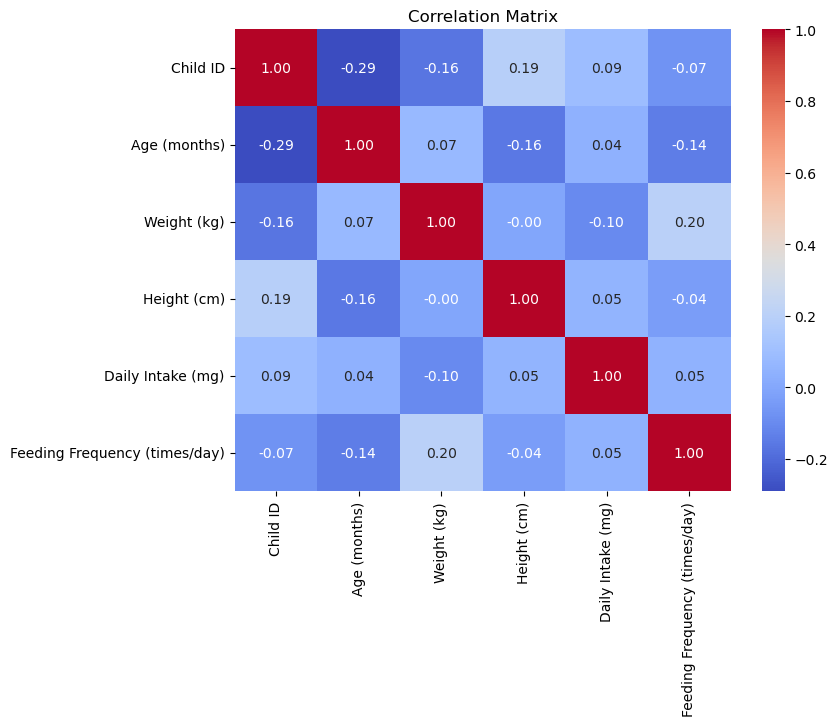

In [81]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(df_sorted.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


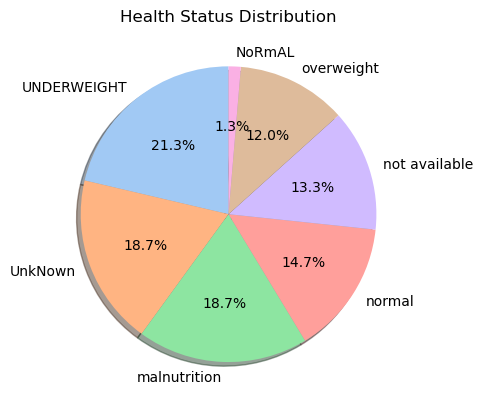

In [83]:
df_sorted['Health Status'].value_counts().plot(kind='pie', autopct='%1.1f%%', 
                                                startangle=90, shadow=True, 
                                                colors=sns.color_palette("pastel"))
plt.title('Health Status Distribution')
plt.ylabel('')  # برای حذف برچسب y
plt.show()
